In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/sample_submission.csv
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train.csv
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/83caa8a85e03606cf57e49147d7ac569.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/7550347fa2bb96c2354a3716dfa3a69c.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/74b23792db329cff5843e36efb8aa65a.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/94568a546be103177cb582d3e91cd2d8.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/6da36354fc904b63bc03eb3884e0c35c.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/5b3620a56668010877cfafa9322e18b5.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/5157d5c9b1f0004b29310652ea54e825.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/74897408dcbd69ef7c76cbbbbeb722d6.dicom
/kaggle/input/vi

In [2]:
import os
import pydicom
import matplotlib.pyplot as plt

# Step 1: Automatically find the folder containing DICOMs
dicom_files = []
for root, _, files in os.walk('/kaggle/input'):
    for f in files:
        if f.lower().endswith(('.dcm', '.dicom')):
            dicom_files.append(os.path.join(root, f))

# Step 2: Check if any files found
if len(dicom_files) == 0:
    print("No DICOM files found in /kaggle/input. Check your dataset structure.")
else:
    print(f" Found {len(dicom_files)} DICOM files.")
    print("Example file path:", dicom_files[0])

# Limit to the first 10 images for inspection
num_to_show = min(10, len(dicom_files))
print(f"\n Displaying first {num_to_show} images...\n")

 Found 18000 DICOM files.
Example file path: /kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/83caa8a85e03606cf57e49147d7ac569.dicom

 Displaying first 10 images...



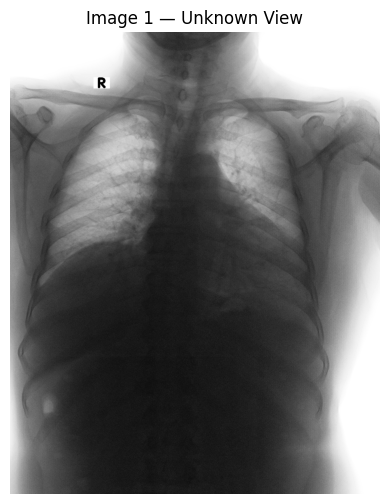

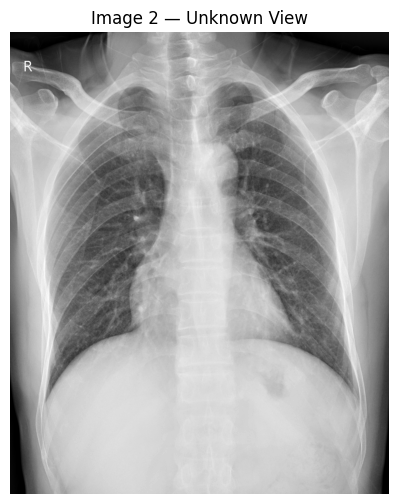

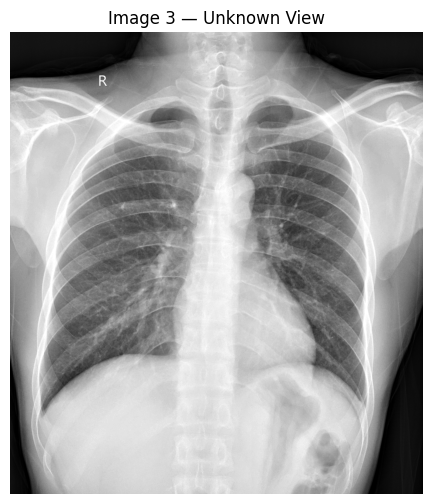

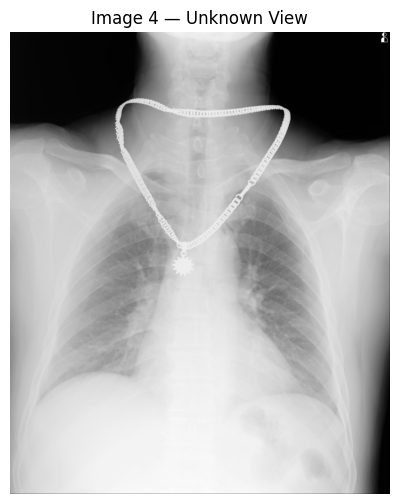

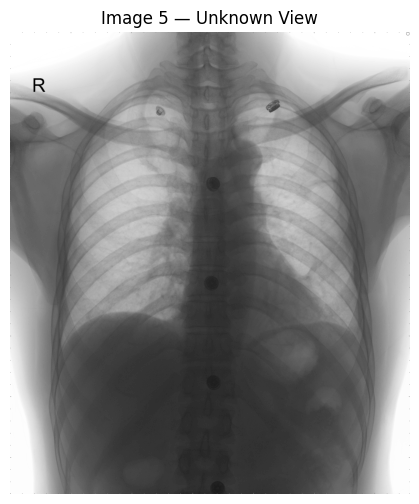

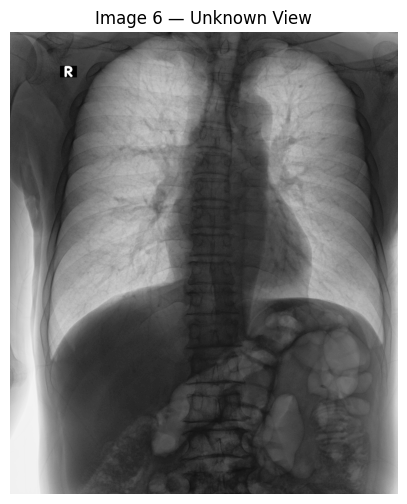

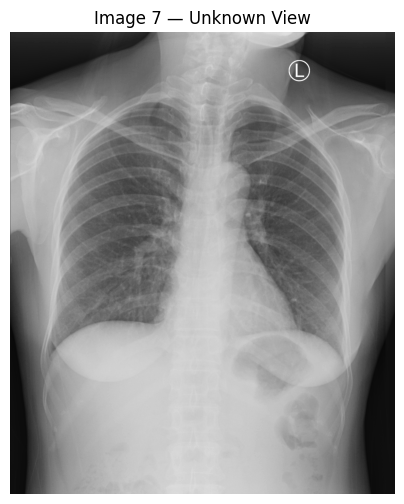

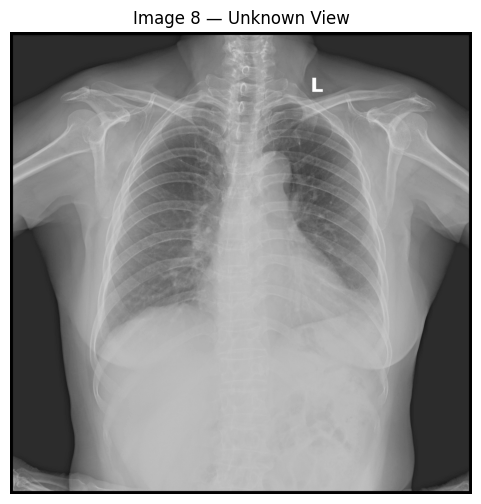

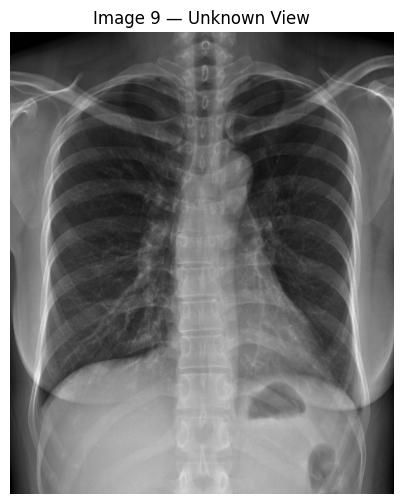

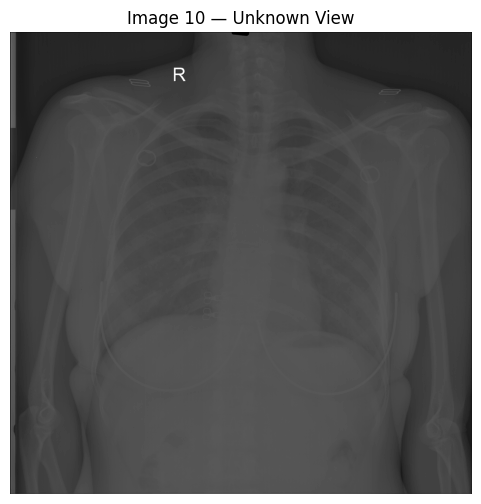

In [3]:
# Step 3 – DISPLAY FIRST 10 IMAGES

import numpy as np
for i in range(num_to_show):
    dicom_path = dicom_files[i]
    dicom_data = pydicom.dcmread(dicom_path)

    image = dicom_data.pixel_array.astype(np.float32)
    image_norm = (image - image.min()) / (image.max() - image.min())

    plt.figure(figsize=(6,6))
    plt.imshow(image_norm, cmap='gray')
    plt.title(f"Image {i+1} — {dicom_data.get('ViewPosition', 'Unknown View')}")
    plt.axis('off')
    plt.show()

In [4]:
# Step 4 – PREPROCESSING CONSTANTS

import torchvision 
from torchvision import transforms

TARGET_SIZE = 512
IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD  = [0.229, 0.224, 0.225]

transform_pipeline = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=IMAGENET_MEAN, std=IMAGENET_STD)
])

processed_tensors = []

In [5]:
# Step 5 – PROCESS ALL 10 IMAGES

import cv2
print("\n Running preprocessing on first 10 images...\n")

for i in range(num_to_show):

    dicom_path = dicom_files[i]
    dicom_data = pydicom.dcmread(dicom_path)

    # 1. Read pixel array
    image = dicom_data.pixel_array.astype(np.float32)
    # 2. Min-Max Normalization (0–1)
    image_norm = (image - image.min()) / (image.max() - image.min())
    # 3. Convert to RGB (H,W → H,W,3)
    image_rgb = np.stack([image_norm]*3, axis=-1)
    # 4. Convert to uint8 for CV resize
    image_uint8 = (image_rgb * 255).astype(np.uint8)

    # Define helper function properly
    def process(image_uint8):
        # 5. Resize to target size (downscaling)
        image_resized = cv2.resize(
            image_uint8,
            (TARGET_SIZE, TARGET_SIZE),
            interpolation=cv2.INTER_LINEAR
        )
        return image_resized

    # Call the function
    image_resized = process(image_uint8)

    # 6. Convert to tensor + ImageNet normalization
    tensor = transform_pipeline(image_resized)

    processed_tensors.append(tensor)
    
print("\n Preprocessing complete for all 10 images!")
print(f"Final tensor shape example: {processed_tensors[0].shape}")



 Running preprocessing on first 10 images...


 Preprocessing complete for all 10 images!
Final tensor shape example: torch.Size([3, 512, 512])


In [6]:
# 1. Convert into RGB (Grayscale to 3-Channel)
# Stacks the single normalized channel three times along the last axis (-1).
# Shape changes from (H, W) to (H, W, 3)
image_rgb = np.stack([image_normalized] * 3, axis=-1)

# The pixel values are still float [0.0, 1.0]

print(f"Step 1: RGB Conversion complete. Shape: {image_rgb.shape}")

NameError: name 'image_normalized' is not defined

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # 2 rows × 5 columns
axes = axes.flatten()  # Flatten to easily index

for i in range(num_to_show):  # num_to_show = 10
    dicom_path = dicom_files[i]
    dicom_data = pydicom.dcmread(dicom_path)

    # Read pixel array
    image = dicom_data.pixel_array.astype(np.float32)
    image_norm = (image - image.min()) / (image.max() - image.min())

    # Show each image in subplot
    axes[i].imshow(image_norm, cmap="gray")
    axes[i].set_title(
        f"Sample {i+1}\n{dicom_data.get('ViewPosition','Unknown')}",
        fontsize=12
    )
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np
import albumentations as A

# --- 5. Light Contrast Enhancement (CLAHE Method) ---
def apply_clahe(image: np.ndarray, clip_limit: float = 2.0, tile_grid_size: tuple = (8, 8)) -> np.ndarray:
    
    # Convert to 8-bit (uint8) if necessary for CLAHE processing
    if image.dtype != np.uint8:
        image_8bit = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    else:
        image_8bit = image

    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    enhanced_image = clahe.apply(image_8bit)
    
    return enhanced_image

In [ ]:
import cv2
import numpy as np
import albumentations as A

# --- 5. Light Contrast Enhancement (CLAHE Method) ---
def apply_clahe(image: np.ndarray, clip_limit: float = 2.0, tile_grid_size: tuple = (8, 8)) -> np.ndarray:
    
    # Convert to 8-bit (uint8) if necessary for CLAHE processing
    if image.dtype != np.uint8:
        image_8bit = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    else:
        image_8bit = image

    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    enhanced_image = clahe.apply(image_8bit)
    
    return enhanced_image

In [ ]:
# --- 7. Crop Borders & 8. Padding for Uniform Shape ---
def crop_and_pad(image: np.ndarray, target_size: int = 1024, tolerance: int = 5) -> tuple[np.ndarray, tuple[int, int], tuple[int, int], float]:

    # 1. Crop Borders
    temp_img = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    mask = temp_img > tolerance
    coords = np.argwhere(mask)
    
    x_min, y_min, x_max, y_max = 0, 0, image.shape[1], image.shape[0] # Default
    if coords.size > 0:
        y_min, x_min = coords.min(axis=0)
        y_max, x_max = coords.max(axis=0)
        cropped_image = image[y_min:y_max+1, x_min:x_max+1]
    else:
        cropped_image = image
    
    h, w = cropped_image.shape[:2]
    
    # 2. Pad to Uniform Shape
    ratio = target_size / max(h, w)
    new_w = int(w * ratio)
    new_h = int(h * ratio)
    
    resized_image = cv2.resize(cropped_image, (new_w, new_h), interpolation=cv2.INTER_LINEAR)
    
    # Calculate padding offsets
    pad_w = target_size - new_w
    pad_h = target_size - new_h
    top = pad_h // 2
    left = pad_w // 2
    
    # Apply padding
    padded_image = cv2.copyMakeBorder(
        resized_image, top, pad_h - top, left, pad_w - left, 
        cv2.BORDER_CONSTANT, value=0
    )
    
    # Return all necessary parameters for corresponding annotation transformation
    return padded_image, (x_min, y_min), (left, top), ratio

In [ ]:
# --- 9. Annotation Conversions YOLO format ---
def convert_to_yolo_format(bbox_coco_abs: list, img_width: int, img_height: int) -> list:
    
    # Ensure inputs are floats
    x_min, y_min, w, h = [float(x) for x in bbox_coco_abs]
    
    # Calculate center coordinates
    x_center = x_min + (w / 2)
    y_center = y_min + (h / 2)
    
    # Normalize coordinates
    x_center_norm = x_center / img_width
    y_center_norm = y_center / img_height
    w_norm = w / img_width
    h_norm = h / img_height
    
    # Clamp values to [0, 1] for safety
    return [
        max(0.0, min(1.0, x_center_norm)),
        max(0.0, min(1.0, y_center_norm)),
        max(0.0, min(1.0, w_norm)),
        max(0.0, min(1.0, h_norm))
    ]

In [ ]:
# --- 10. Safe augmentations (Horizontal flips, Small rotations, etc.) ---
def get_safe_augmentations():
    
    return A.Compose(
        [
            # 1. Horizontal flips
            A.HorizontalFlip(p=0.5),

            # 2. Small rotations (<= 5 degrees)
            A.Rotate(limit=5, border_mode=cv2.BORDER_CONSTANT, value=0, p=0.5),
            
            # 3. Contrast adjustment (mild)
            A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.5),

            # 4. Mild zoom-in (using ShiftScaleRotate with only scale)
            A.ShiftScaleRotate(
                shift_limit=0.0, 
                scale_limit=(-0.1, 0.1), # Mild zoom/scale
                rotate_limit=0, 
                p=0.5, border_mode=cv2.BORDER_CONSTANT, value=0
            ),
            
            # 5. Mild elastic deformation (small alpha and sigma)
            A.ElasticTransform(
                alpha=1, sigma=50, alpha_affine=10, 
                border_mode=cv2.BORDER_CONSTANT, value=0, p=0.2
            ),
        ],
        # Specify that bounding boxes are in 'yolo' format
        bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids'])
    )


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm # Useful for showing progress during file iteration

# --- 11. Train/Test/Val Split ---
def perform_train_test_val_split(all_file_ids: list, labels: list, test_size: float = 0.1, val_size: float = 0.1, random_state: int = 42):
    
    # Calculate proportions
    temp_size = test_size + val_size
    # Relative size of validation set within the temp set
    val_rel_size = val_size / temp_size if temp_size > 0 else 0.5

    # 1. Split: Train (80%) vs. Temp (20% -> Test + Val)
    train_ids, temp_ids, _, temp_labels = train_test_split(
        all_file_ids, labels, test_size=temp_size, random_state=random_state, stratify=labels
    )

    # 2. Split: Temp into Validation (10%) and Test (10%)
    val_ids, test_ids, _, _ = train_test_split(
        temp_ids, temp_labels, test_size=val_rel_size, random_state=random_state, stratify=temp_labels
    )
    
    # Save the splits to text files
    pd.Series(train_ids).to_csv('train_split.txt', index=False, header=False)
    pd.Series(val_ids).to_csv('val_split.txt', index=False, header=False)
    pd.Series(test_ids).to_csv('test_split.txt', index=False, header=False)
    
    print(f"Train Set Size: {len(train_ids)} ({len(train_ids)/len(all_file_ids)*100:.1f}%)")
    print(f"Validation Set Size: {len(val_ids)} ({len(val_ids)/len(all_file_ids)*100:.1f}%)")
    print(f"Test Set Size: {len(test_ids)} ({len(test_ids)/len(all_file_ids)*100:.1f}%)")
    
    return train_ids, val_ids, test_ids


In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # 2 rows × 5 columns
axes = axes.flatten()  # Flatten to easily index

for i in range(num_to_show):  # num_to_show = 10
    dicom_path = dicom_files[i]
    dicom_data = pydicom.dcmread(dicom_path)

    # Read pixel array
    image = dicom_data.pixel_array.astype(np.float32)
    image_norm = (image - image.min()) / (image.max() - image.min())

    # Show each image in subplot
    axes[i].imshow(image_norm, cmap="gray")
    axes[i].set_title(
        f"Sample {i+1}\n{dicom_data.get('ViewPosition','Unknown')}",
        fontsize=12
    )
    axes[i].axis("off")

plt.tight_layout()
plt.show()